In [4]:
import pathlib
import pandas as pd
import numpy as np
import pickle as pkl
import numpy as np
from icecream import ic
import sys
import os
from sklearn.manifold import TSNE, MDS
import umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
lmbdas = [0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
num_lmbdas = len(lmbdas)
METRICS = ["Procrustes", "CKA", "PWCCA", "mean_cca_corr", "mean_sq_cca_corr"] + ["PredDist_" + str(lmbdas[i]) for i in range(num_lmbdas)]

In [6]:
def symmetrize(A):
    n = A.shape[0]
    B = A.copy()
    B[np.tril_indices(n)] = B.T[np.tril_indices(n)]
    return B

## Embedd 10 randomly initialized NLP 12-layer base BERT architectures after training

In [7]:
num_layers = 12
seeds_list = range(1, 11)
num_seeds = len(seeds_list)

In [8]:
full_df = pd.read_csv("full_df_self_computed.csv")

In [9]:
num_seeds = 10
num_layers = 12

mean_sq_cca = np.zeros((num_seeds, num_seeds, num_layers, num_layers))
mean_sq_cca[:] = np.nan
mean_cca = np.zeros((num_seeds, num_seeds, num_layers, num_layers))
mean_cca[:] = np.nan
pwcca = np.zeros((num_seeds, num_seeds, num_layers, num_layers))
pwcca[:] = np.nan
lin_cka = np.zeros((num_seeds, num_seeds, num_layers, num_layers))
lin_cka[:] = np.nan
procrustes_dist = np.zeros((num_seeds, num_seeds, num_layers, num_layers))
procrustes_dist[:] = np.nan
pred_dists = np.zeros((num_seeds, num_seeds, num_layers, num_layers, num_lmbdas))
pred_dists[:] = np.nan
for seed1 in range(num_seeds):
    for seed2 in range(seed1, num_seeds):
        for layer1 in range(num_layers):
            for layer2 in range(num_layers):
                if seed1 == seed2 and layer1 > layer2:
                    pass
                else:
                    sub_df = full_df[(full_df["seed1"] == seed1+1) & (full_df["seed2"] == seed2+1) & (full_df["layer1"] == layer1) & (full_df["layer2"] == layer2)]
                    mean_sq_cca[seed1, seed2, layer1, layer2] = sub_df["mean_sq_cca_corr"]
                    mean_cca[seed1, seed2, layer1, layer2] = sub_df["mean_cca_corr"]
                    pwcca[seed1, seed2, layer1, layer2] = sub_df["PWCCA"]
                    lin_cka[seed1, seed2, layer1, layer2] = sub_df["CKA"]
                    procrustes_dist[seed1, seed2, layer1, layer2] = sub_df["Procrustes"]
                    pred_dists[seed1, seed2, layer1, layer2, :] = sub_df[METRICS[5:]]


In [10]:
rs = np.random.randint(0, 200, num_seeds)/256
gs = np.random.randint(0, 200, num_seeds)/256
bs = np.random.randint(0, 200, num_seeds)/256
t = 0.6

cmap = plt.cm.tab10
colors = [cmap(i) for i in range(num_seeds)]

In [11]:
ls = [1, 3, 5, 7, 9]
metric_names = ["GULP λ = 1e-7", "GULP λ = 1e-5", "GULP λ = 1e-3", "GULP λ = 1e-1", "GULP λ = 1e1"]

0


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


1


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


2


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


3


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


4


/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


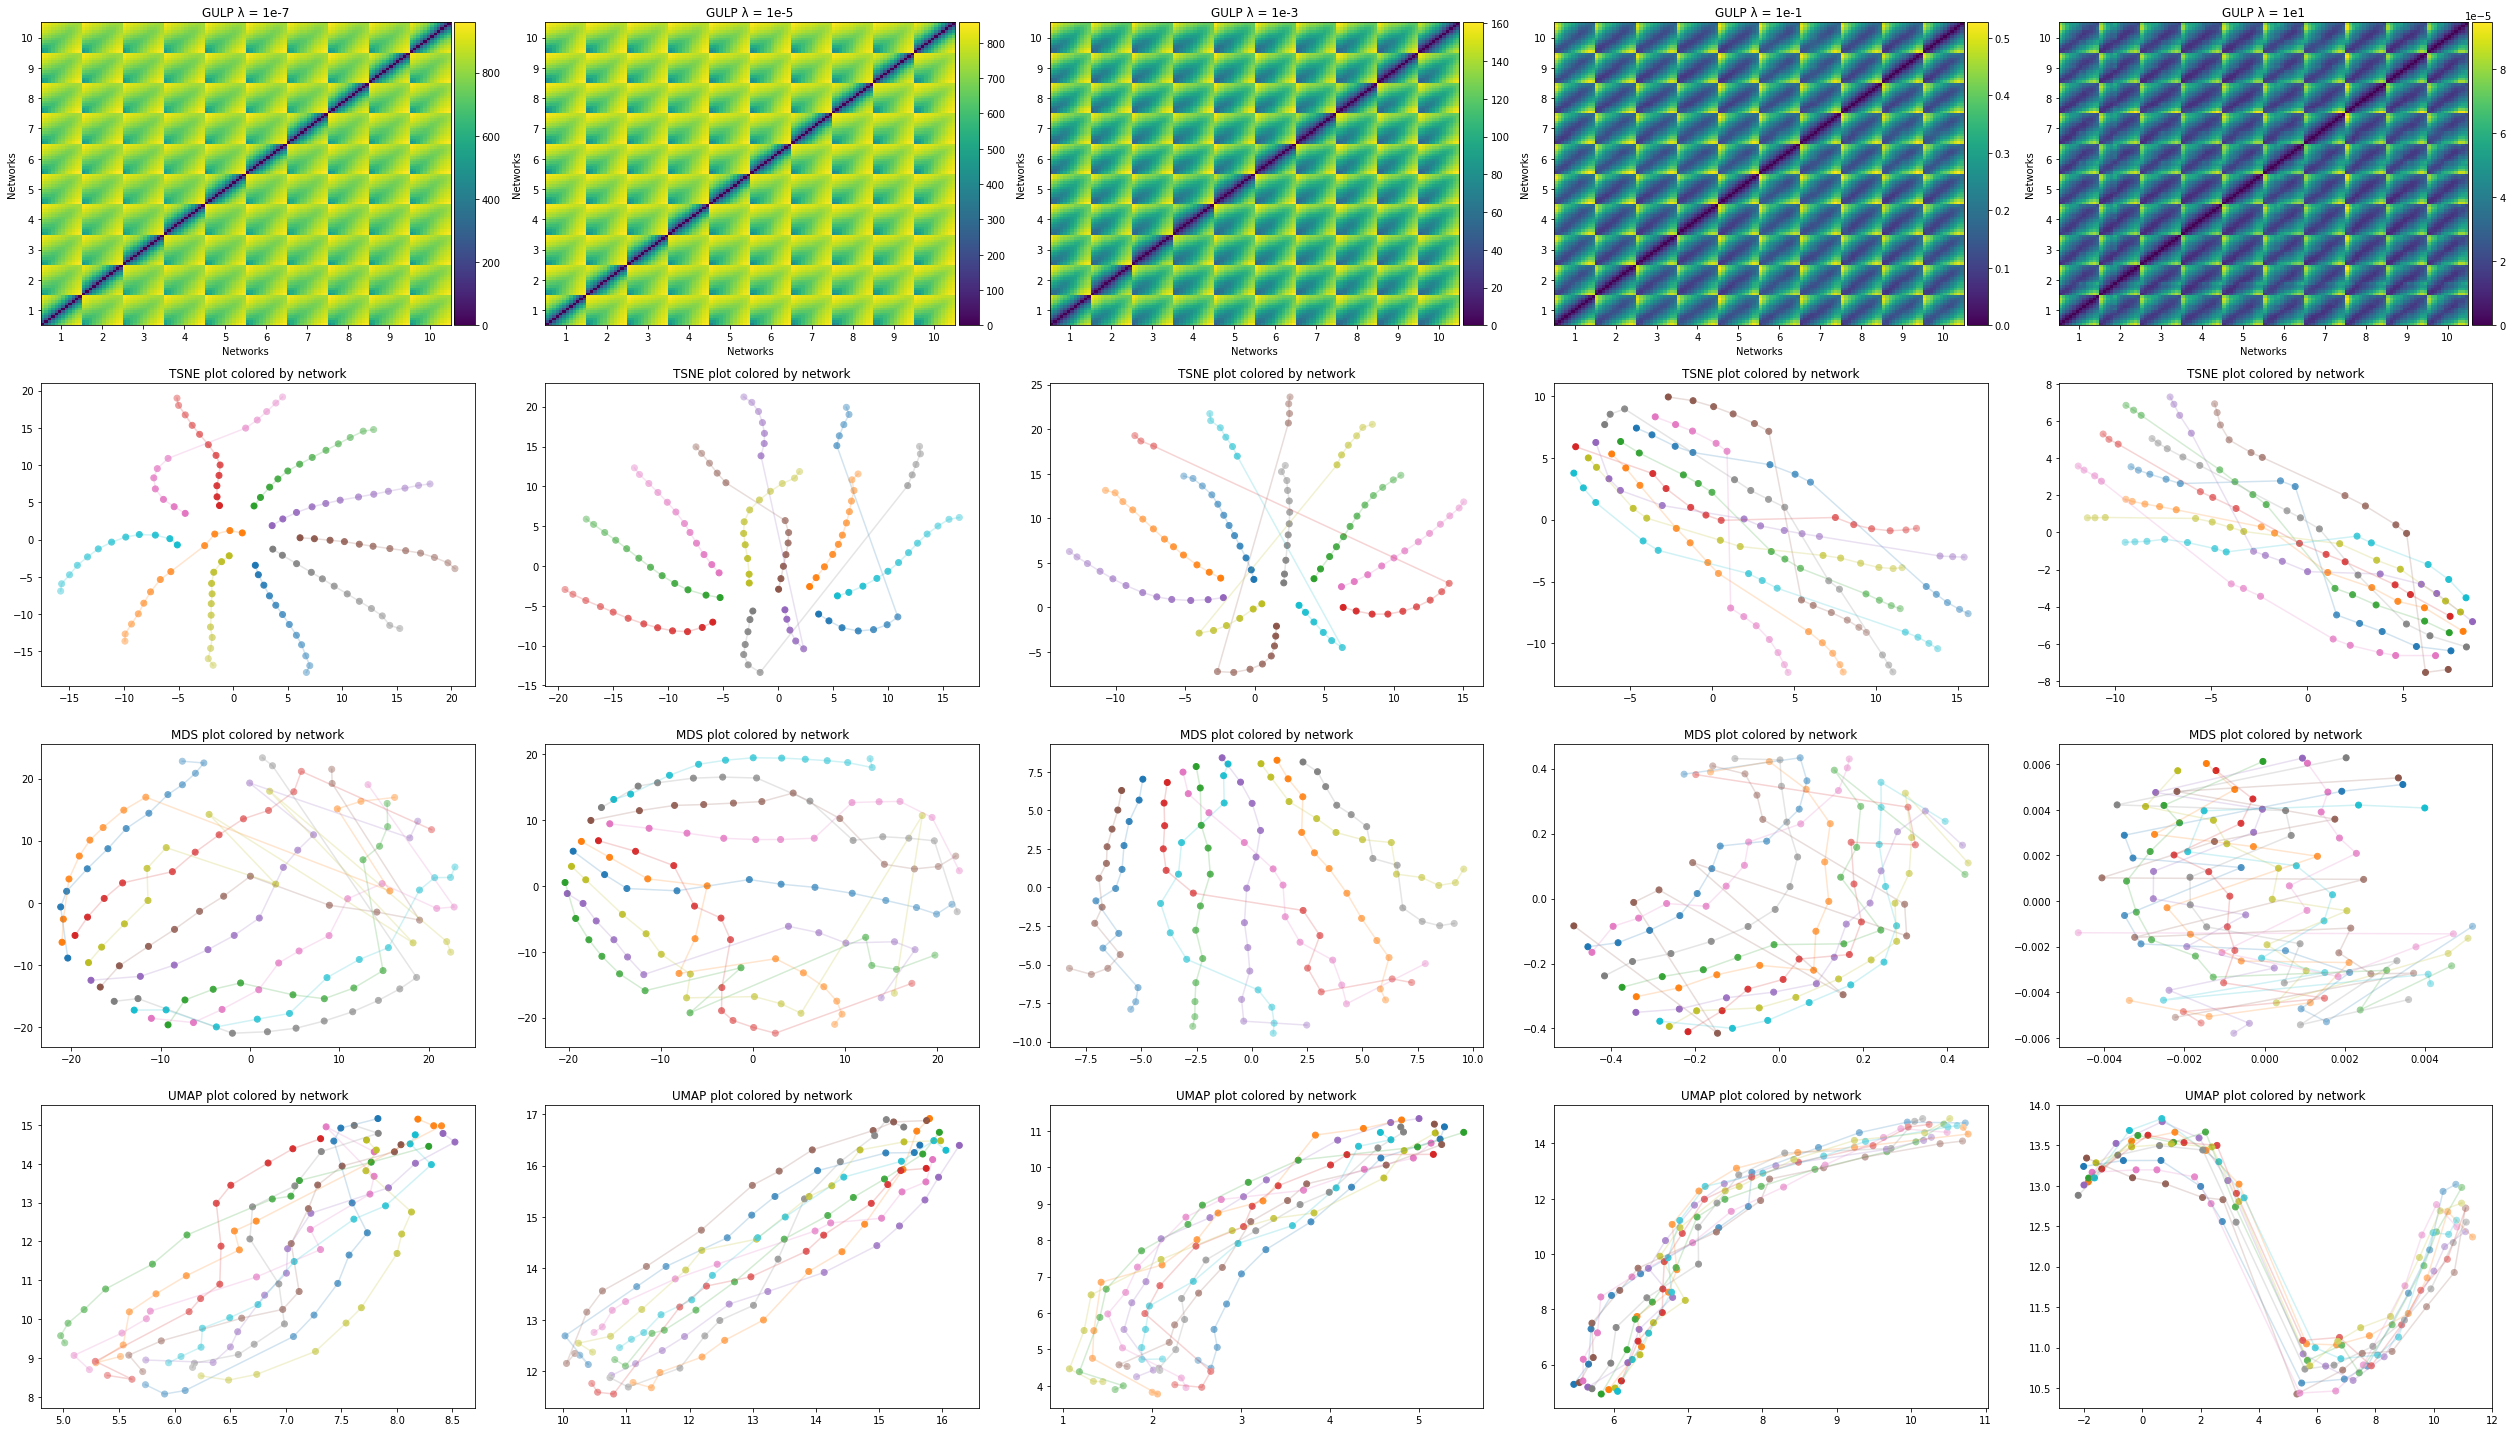

In [12]:
fig, axs = plt.subplots(4, len(ls), figsize=(35, 20))

for k in range(len(ls)):
    print(k)
    l = ls[k]
    
    D = np.transpose(pred_dists[:, :, :, :, l], (0, 2, 1, 3))
    D = np.reshape(D, (num_seeds*num_layers, num_seeds*num_layers))
    D = symmetrize(D)
    D = np.maximum(D, 0)
    
    ax = axs[0, k]
    im = ax.pcolormesh(D)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_title(metric_names[k])
    ax.set_xticks(np.linspace(num_layers/2, num_layers*(num_seeds-1/2), num_seeds))
    ax.set_xticklabels(seeds_list)
    ax.set_xlabel("Networks")
    ax.set_yticks(np.linspace(num_layers/2, num_layers*(num_seeds-1/2), num_seeds))
    ax.set_yticklabels(seeds_list)
    ax.set_ylabel("Networks")
    
    X_embedded_TSNE = TSNE(n_components=2, perplexity=30.0, init="random", metric="precomputed").fit_transform(D)
    ax = axs[1, k]
    for i in range(num_seeds):
        vals = np.ones((256, 4))
        vals[:, 0] = np.linspace(colors[i][0], t+(1-t)*colors[i][0], 256)
        vals[:, 1] = np.linspace(colors[i][1], t+(1-t)*colors[i][1], 256)
        vals[:, 2] = np.linspace(colors[i][2], t+(1-t)*colors[i][2], 256)
        cmap = ListedColormap(vals)
        ax.plot(X_embedded_TSNE[num_layers*i:num_layers*(i+1), 0], X_embedded_TSNE[num_layers*i:num_layers*(i+1), 1], c=colors[i], alpha=0.2)
        ax.scatter(X_embedded_TSNE[num_layers*i:num_layers*(i+1), 0], X_embedded_TSNE[num_layers*i:num_layers*(i+1), 1], c=np.arange(num_layers), cmap=cmap)
    ax.set_title("TSNE plot colored by network")

    X_embedded_MDS = MDS(n_components=2, dissimilarity="precomputed").fit_transform(np.sqrt(D))
    ax = axs[2, k]
    for i in range(num_seeds):
        vals = np.ones((256, 4))
        vals[:, 0] = np.linspace(colors[i][0], t+(1-t)*colors[i][0], 256)
        vals[:, 1] = np.linspace(colors[i][1], t+(1-t)*colors[i][1], 256)
        vals[:, 2] = np.linspace(colors[i][2], t+(1-t)*colors[i][2], 256)
        cmap = ListedColormap(vals)
        ax.plot(X_embedded_MDS[num_layers*i:num_layers*(i+1), 0], X_embedded_MDS[num_layers*i:num_layers*(i+1), 1], c=colors[i], alpha=0.2)
        ax.scatter(X_embedded_MDS[num_layers*i:num_layers*(i+1), 0], X_embedded_MDS[num_layers*i:num_layers*(i+1), 1], c=np.arange(num_layers), cmap=cmap)
    ax.set_title("MDS plot colored by network")

    X_embedded_UMAP = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1).fit_transform(np.sqrt(D))
    ax = axs[3, k]
    for i in range(num_seeds):
        vals = np.ones((256, 4))
        vals[:, 0] = np.linspace(colors[i][0], t+(1-t)*colors[i][0], 256)
        vals[:, 1] = np.linspace(colors[i][1], t+(1-t)*colors[i][1], 256)
        vals[:, 2] = np.linspace(colors[i][2], t+(1-t)*colors[i][2], 256)
        cmap = ListedColormap(vals)
        ax.plot(X_embedded_UMAP[num_layers*i:num_layers*(i+1), 0], X_embedded_UMAP[num_layers*i:num_layers*(i+1), 1], c=colors[i], alpha=0.2)
        ax.scatter(X_embedded_UMAP[num_layers*i:num_layers*(i+1), 0], X_embedded_UMAP[num_layers*i:num_layers*(i+1), 1], c=np.arange(num_layers), cmap=cmap)
    ax.set_title("UMAP plot colored by network")
fig.tight_layout()
plt.savefig("../paper_figures/bert_layer_embedding.pdf")
plt.show()